In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data_raw = pd.read_csv('data.csv')
durations = []
dT = 0.01  # it will be  changed

with open('/home/marcel/catkin_ws/src/dynamic-model-car-simulator/params.txt') as file:
    l = file.readline()
    file.readline()
    dT = float((l.split(' '))[1])
    for line in file:
        l = line.split(' ')
        durations.append(float(l[2]) * (1/dT))
        
print(durations)
changes = [durations[0]]
s = durations[0]
for dur in durations[1:]:
    changes.append(dur+s)
    s = s+dur

print(changes)    
print(dT)
data = pd.DataFrame(data=data_raw)
interest_a = 190
interest_b = 210
d = data[interest_a:interest_b] #19 30

n = 1   # granularity
d


[200.0, 200.0, 500.0, 200.0]
[200.0, 400.0, 900.0, 1100.0]
0.01


,x,y,t,torque,steering_angle,long_vel,lat_vel,yaw_angle,yaw_rate,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r
190,0.936275,0.000000,1.90,100.0,0.000,0.980392,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
191,0.946130,0.000000,1.91,100.0,0.000,0.985552,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
192,0.956037,0.000000,1.92,100.0,0.000,0.990712,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
193,0.965996,0.000000,1.93,100.0,0.000,0.995872,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
194,0.976006,0.000000,1.94,100.0,0.000,1.001030,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
195,0.986068,0.000000,1.95,100.0,0.000,1.006190,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
196,0.996182,0.000000,1.96,100.0,0.000,1.011350,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
197,1.006350,0.000000,1.97,100.0,0.000,1.016510,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
198,1.016560,0.000000,1.98,100.0,0.000,1.021670,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000
199,1.026830,0.000000,1.99,100.0,0.000,1.026830,0.000000,0.000000,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.0000,0.00000


In [57]:
#change_1 = int(angle_ch_t_1/dT)
#change_2 = int(angle_ch_t_2/dT)
#change_1

Text(0.5, 1.0, 'y(t)')

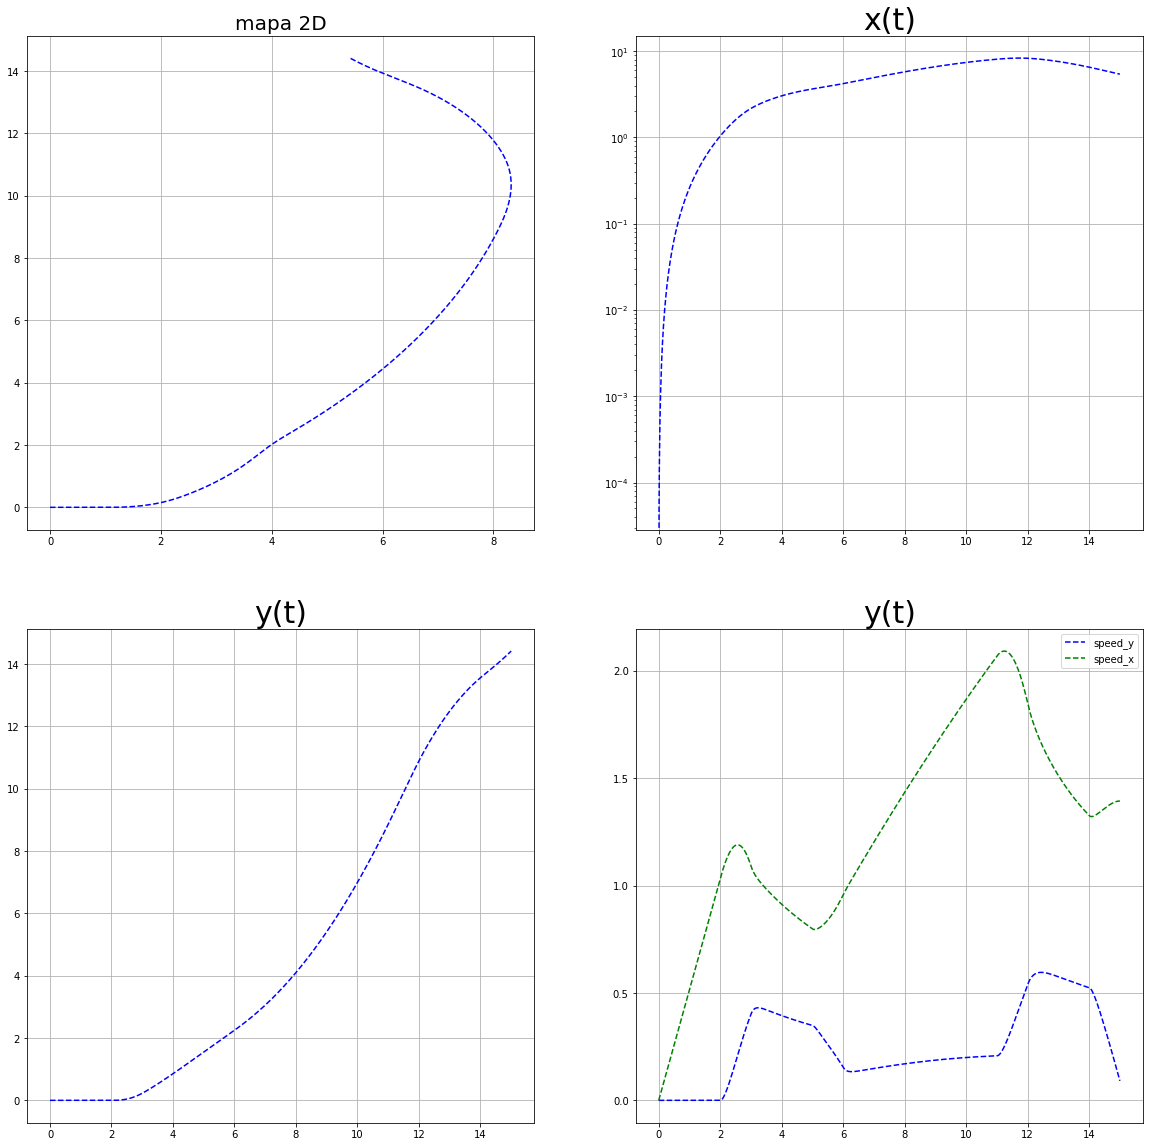

In [58]:
plt.figure(figsize=(20,20))

x = data['x']
y = data['y']
t = data['t']
speed_x = data['long_vel']
speed_y = data['lat_vel']

# mapa 2d
plt.subplot(221)
plt.plot(x, y, '--b')
plt.grid(True)
plt.title('mapa 2D', fontsize=20)


# x(t)
plt.subplot(222)
plt.plot(t, x, '--b')
plt.grid(True)
plt.title('x(t)', fontsize=30)
plt.yscale('log')


# y(t)
plt.subplot(223)
plt.plot(t, y, '--b')
plt.grid(True)
plt.title('y(t)', fontsize=30)

# speed
ax = plt.subplot(224)
ax.plot(t, speed_y, '--b', label='speed_y')
ax.plot(t, speed_x, '--g', label='speed_x',)
ax.grid(True)
ax.legend()
plt.title('y(t)', fontsize=30)


[]

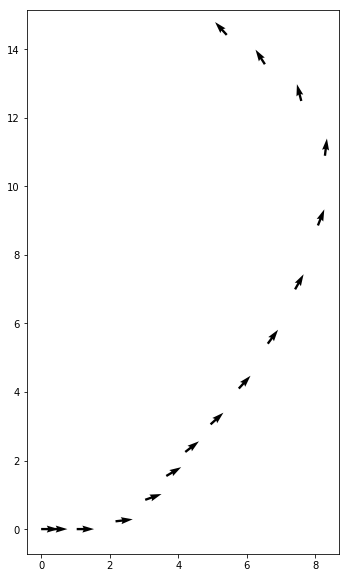

In [59]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 100

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

Text(0.5, 1.0, 'torque(t)')

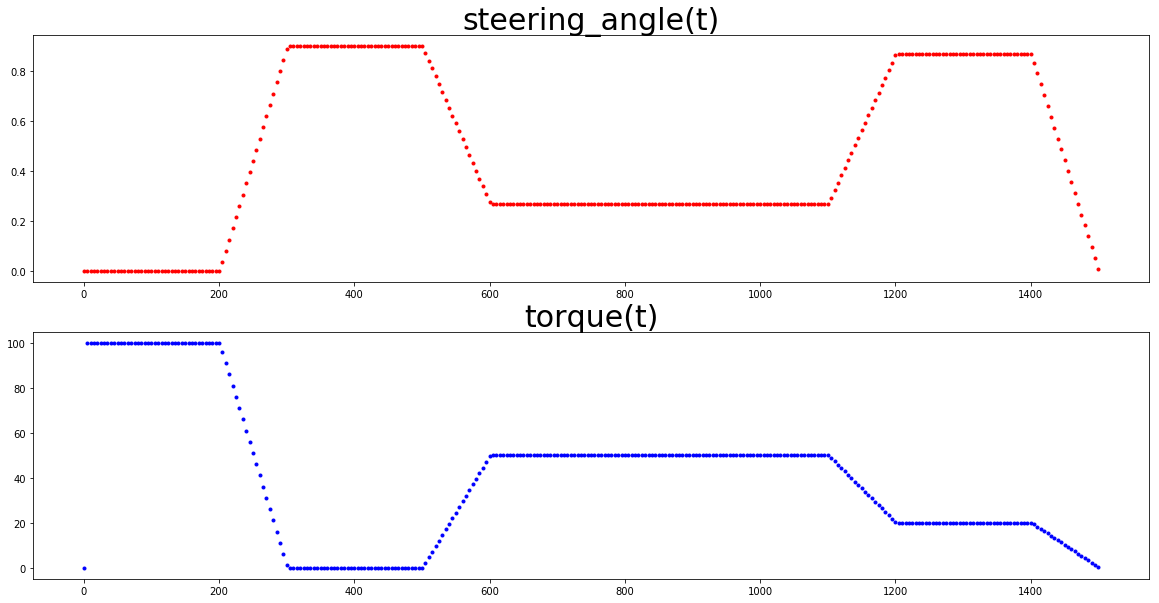

In [62]:
fig = plt.figure(figsize=(20,10))

plt.subplot(211)
plt.plot(data['steering_angle'][:][::5], '.r')
plt.title('steering_angle(t)', fontsize=30)

plt.subplot(212)
plt.plot(data['torque'][:][::5], '.b')
plt.title('torque(t)', fontsize=30)

Text(0.5, 1.0, 'kąt(t)')

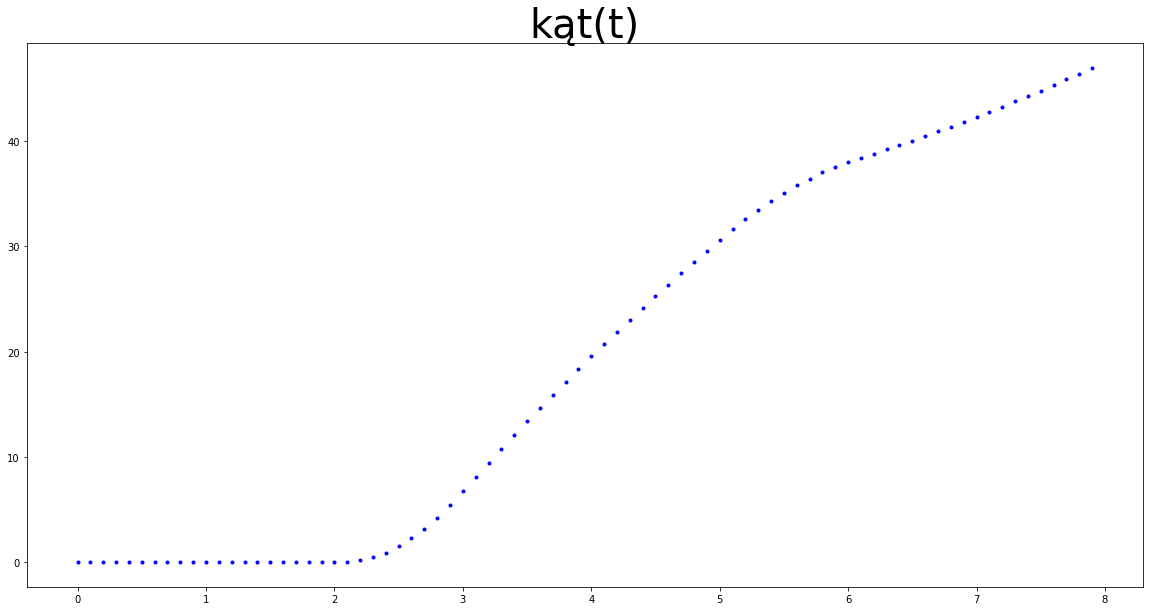

In [67]:
interest_a = 0
interest_b = 800
n = 10
yaw = np.rad2deg(np.unwrap(data['yaw_angle'][interest_a:interest_b][::n])) %360

max_yaw = np.max(yaw)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][interest_a:interest_b][::n], yaw, '.b')
plt.title('kąt(t)', fontsize=40)

Text(0.5, 1.0, 'speed x and y')

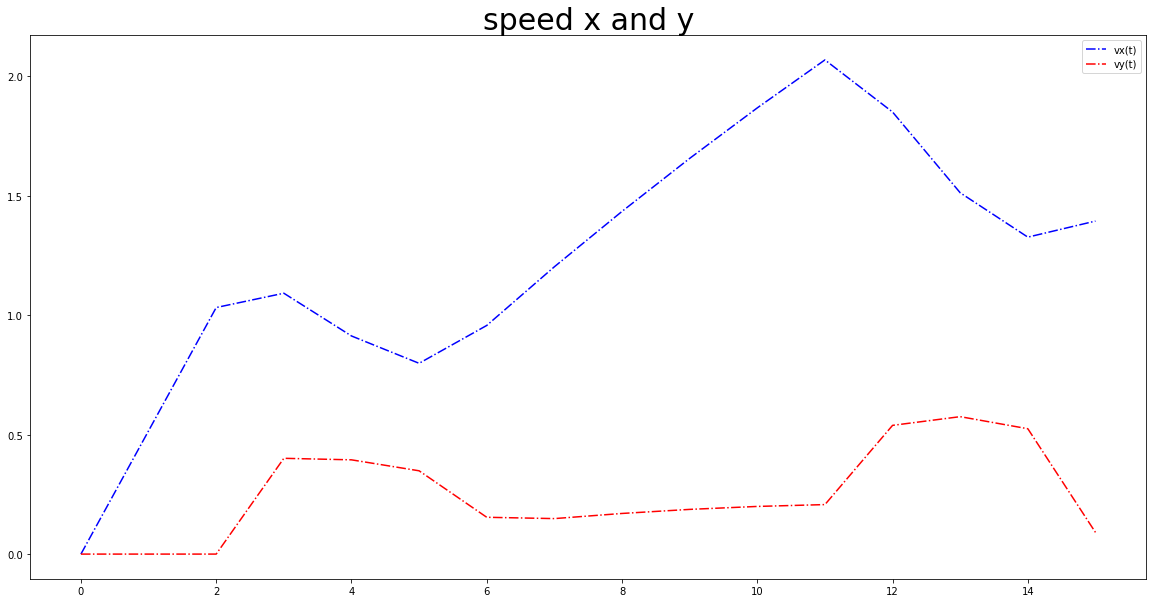

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
max_speed = np.max([data['long_vel'], data['lat_vel']])
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
leg = ax.legend();
plt.title('speed x and y', fontsize=30)

In [ ]:
max_speed

Text(0.5, 1.0, 'slip_angle_front(t)')

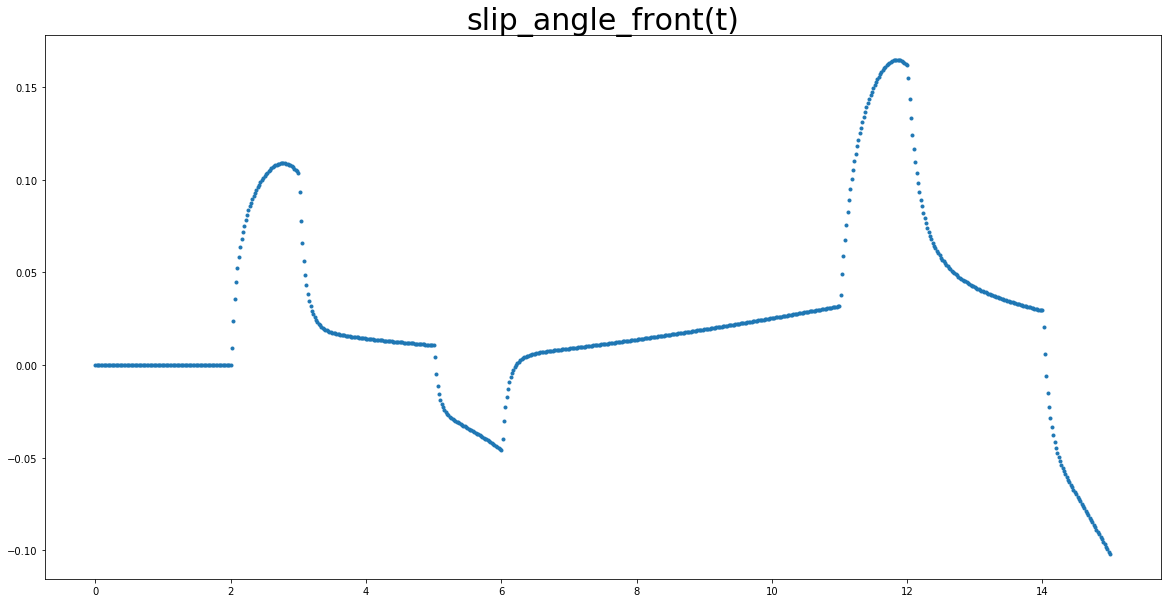

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
slip_angle = data['slip_angle_f']
interest_a = 0
interest_b = 0
n = 2

max_slip = np.max([data['slip_angle_f'], data['slip_angle_r']])
ax.plot(data['t'][:][::n], slip_angle[:][::n], '.')
plt.title('slip_angle_front(t)', fontsize=30)
#ax.plot([angle_ch_t_1]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', \
#         [angle_ch_t_2]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', alpha=0.2)

NameError: name 'angle_ch_t_1' is not defined

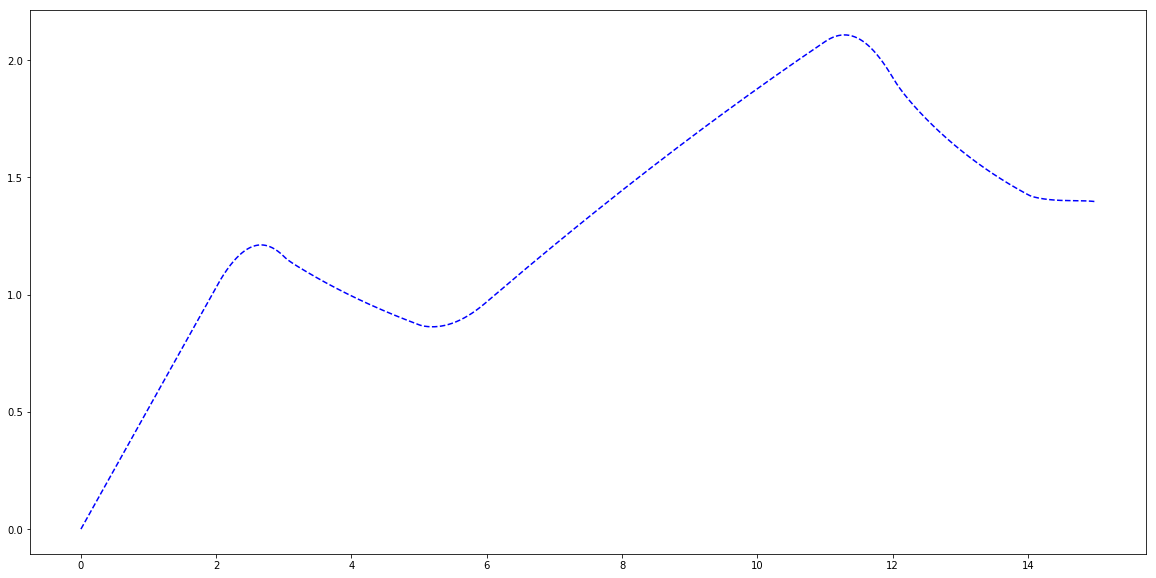

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
energy_data = np.sqrt(data['long_vel'][:]**2 + data['lat_vel'][:]**2)
max_en = np.max(energy_data)

ax.plot(data['t'][:], energy_data, '--b')
ax.plot([angle_ch_t_1]*10, np.arange(0,max_en,max_en/10), '-r', \
         [angle_ch_t_2]*10, np.arange(0,max_en,max_en/10), '-r', alpha=0.2)
plt.title('vx^2 + vy^2', fontsize=30)

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

interest_a = 0
interest_b = 700

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][interest_a:interest_b][::n], data['y'][interest_a:interest_b][::n])

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['x'], 'r--')
plt.title('x(t)', fontsize=20)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['y'])
plt.title('y(t)', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_f'][interest_a:interest_b][::n], '--b', label='norm_load_f(t)')
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_r'][interest_a:interest_b][::n], '--r', label='norm_load_r(t)')
leg = ax.legend();

In [ ]:
plt.plot(np.diff(slip_angle[interest_a:interest_b][::n]), '.')


In [ ]:
plt.plot(data['t'], data['yaw_rate'])

In [ ]:
plt.plot(data['t'][:-1], np.diff(data['yaw_angle']))